# Wine Quality Predictor

The first section of this project will predict using only numpy calculations

I will use Dropout, the Adam Optimizer and and Minibatch Sampling on this Model 

In [61]:
import math
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

import seaborn as sns

In [62]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [51]:
def relu(x):
    s = np.maximum(0,x)
    return s

In [60]:
def d_relu(x):
    return (z > 0).astype(int)

## Dataset Loading

I load the dataset, shuffle it, and then section off the pieces for testing and training

I then use a MinMaxScaler on each row to normalize each input

In [34]:
# load the data from winequality dataset
# has about 5K entries
# data from https://machinelearningmastery.com/standard-machine-learning-datasets/

def loadDataset():
    data = np.genfromtxt("data/winequality-white.csv", delimiter = ";")
    data = np.delete(data, 0, axis = 0)
    
    np.random.shuffle(data)
    
    train, test = data[:3500, :], data[3500:, :]
    
    train_x = train[:,:-1].T
    train_y = train[:,-1].reshape(1, train.shape[0])
    
    train_x = preprocessing.minmax_scale(train_x, axis = 1)
    train_y = preprocessing.minmax_scale(train_y, axis = 1)
    
    test_x = test[:,:-1].T
    test_y = test[:,-1].reshape(1, test.shape[0])
    
    test_x = preprocessing.minmax_scale(test_x, axis = 1)
    test_y = preprocessing.minmax_scale(test_y, axis = 1)
    
    return (train_x, train_y, test_x, test_y)
    

[[0.4625     0.35       0.3375     ... 0.425      0.5625     0.5875    ]
 [0.2254902  0.06862745 0.1372549  ... 0.14705882 0.12745098 0.10784314]
 [0.30722892 0.19277108 0.15060241 ... 0.11445783 0.34939759 0.29518072]
 ...
 [0.27884615 0.40384615 0.50961538 ... 0.33653846 0.23076923 0.35576923]
 [0.44186047 0.56976744 0.1744186  ... 0.36046512 0.3372093  0.3372093 ]
 [0.24793388 0.67768595 0.1322314  ... 0.16528926 0.21487603 0.34710744]]


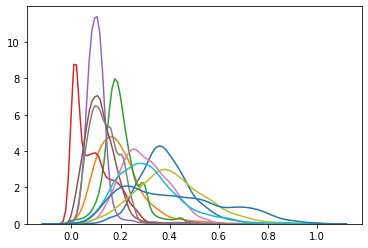

In [33]:
train_x, _, _, _ = loadDataset()

for i in range(train_x.shape[0]):
    sns.kdeplot(train_x[i])

print(train_x)

## Hidden Layer Initialization

I use HE Initialization for the hidden layers, and zero initialization for the biases

HE initialization is when we start the weights by np.random.randn() * $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$


In [40]:
def initialize_parameters(layer_sizes):
    parameters = {}
    
    for i in range(1, len(layer_sizes)):
        parameters["W" + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1]) * math.sqrt(2/layer_sizes[i-1])
        parameters["b" + str(i)] = np.zeros((layer_sizes[i], 1))
        
    return parameters

In [48]:
parameters = initialize_parameters([11, 5, 5, 1])
print(len(parameters))

6


## Forward Propagation

We will implement forward proagation

This forward prop will store the Values of Z

We will also use RELU for all layers except the last where we will use SIGMOID

In [65]:
def forward_prop(X, parameters):
    layers = len(parameters) // 2
    
    cache = {}
    cache["A0"] = X
    
    
    for i in range(1, layers):
        cache["Z" + str(i)] = np.dot(parameters["W" + str(i)], cache["A" + str(i-1)]) + parameters["b" + str(i)]
        cache["A" + str(i)] = relu(cache["Z" + str(i)])
        
    cache["Z" + str(layers)] = np.dot(parameters["W" + str(layers)], cache["A" + str(layers - 1)]) + parameters["b" + str(layers)]
    cache["A" + str(layers)] = sigmoid(cache["Z" + str(layers)])
        
        
    return cache

## Back Propagation

We will implement back propagation


In [69]:
def back_prop(X, Y, parameters, cache):
    m = X.shape[1]
    layers = len(cache) // 2
    
    grads = {}
    
    # using sigmoid
    grads["dZ" + str(layers)] = Y - cache["A" + str(layers)]
    grads["dW" + str(layers)] = 1/m * np.dot(grads["dZ" + str(layers)], cache["A" + str(layers-1)].T)
    grads["db" + str(layers)] = 1/m * np.sum(grads["dZ" + str(layers)], axis=1, keepdims = True)
    
    for i in reversed(range(1, layers)):
        # using relu
        grads["dZ" + str(layers)] = np.dot(parameters["W" + str(i)], cache["dW" + str(i)]) * d_relu(parameters["Z" + str(i)])
        grads["dW" + str(layers)] = 1/m * np.dot(grads["dZ" + str(layers)], cache["A" + str(layers-1)].T)
        grads["db" + str(layers)] = 1/m * np.sum(grads["dZ" + str(layers)], axis=1, keepdims = True)
        
    return grads    

Cost function = 

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

In [72]:
def compute_cost(Z, Y):
    logprobs = Y * np.log(A2) + (1 - Y) * np.log(1 - A2)
    cost = (-1/m) * np.sum(logprobs)
    
    cost = float(np.squeeze(cost))

In [71]:
def update_parameters(parameters, grads, learning_rate):
    layers = len(parameters) // 2
    
    for i in range(layers):
        parameters["W" + str(i+1)] = parameters["W" + str(i+1)] - learning_rate * grads["dW" + str(i+1)]
        parameters["b" + str(i+1)] = parameters["b" + str(i+1)] - learning_rate * grads["db" + str(i+1)]